In [1]:
# 📘 Put–Call Parity Arbitrage Analysis — Workflow Summary

## ✅ Objective
Study Put–Call Parity (PCP) for Bank Nifty options and detect potential arbitrage opportunities, with and without dividend adjustment.

---

## ✅ Data Pipeline

### 1) Data Collection
- Imported Bank Nifty spot data.
- Imported option chain (CE + PE).

---

## ✅ Pre-Processing
- Cleaned datasets.
- Selected matching Call–Put pairs based on:
  - Date
  - Strike Price
  - Expiry

- Merged with Bank Nifty spot data.
- Computed time to expiry:
\[
T = \frac{\text{days to expiry}}{365}
\]

---

## ✅ Put–Call Parity Computation

### (A) Without Dividends
\[
C - P = S - Ke^{-rT}
\]

### (B) With Dividends
\[
C - P = S e^{-qT} - K e^{-rT}
\]

- Computed deviation between LHS & RHS.

---

## ✅ Arbitrage Identification
- Defined transaction cost threshold.
- Labeled data based on:
  - If deviation > threshold → Arbitrage
  - Else → No Arbitrage

---

## ✅ Monthly Classification
- Grouped data by Month.
- Calculated arbitrage frequency per month.

---

## ✅ Visualizations
- Pie charts showing arbitrage vs. non-arbitrage counts.
- Optional histograms / monthly summaries.

---

## ✅ Documentation
- All steps recorded in Notebook:
  - Data import
  - Cleaning
  - PCP formulas
  - Arbitrage tagging
  - Monthly aggregation
  - Plotting



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

banknifty = yf.download("^NSEBANK", start="2025-01-01", end="2025-09-30")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
df = banknifty[['Close']].reset_index()
df.rename(columns={'Close': 'Spot'}, inplace=True)

df['Month'] = df['Date'].dt.to_period('M').astype(str)

In [3]:
df

Price,Date,Spot,Month
Ticker,,^NSEBANK,
0,2025-01-02,51605.550781,2025-01
1,2025-01-03,50988.800781,2025-01
2,2025-01-06,49922.000000,2025-01
3,2025-01-07,50202.148438,2025-01
4,2025-01-08,49835.050781,2025-01
...,...,...,...
179,2025-09-23,55509.750000,2025-09
180,2025-09-24,55121.500000,2025-09
181,2025-09-25,54976.199219,2025-09


In [6]:
monthly_avg = df.groupby('Month')['Spot'].mean().reset_index()
monthly_avg['ATM_Strike'] = (monthly_avg['Spot'] / 100).round() * 100

In [7]:
monthly_avg

Price,Month,Spot,ATM_Strike
Ticker,,^NSEBANK,
0,2025-01,49215.095170,49200.0
1,2025-02,49376.658100,49400.0
2,2025-03,49465.931538,49500.0
3,2025-04,53093.423725,53100.0
4,2025-05,55050.657366,55100.0
5,2025-06,56261.030878,56300.0
6,2025-07,56799.943105,56800.0
7,2025-08,55204.278577,55200.0
8,2025-09,54704.595610,54700.0


In [8]:
df = df.merge(monthly_avg, on="Month", how="left")

C:\Users\Admin\AppData\Local\Temp\ipykernel_22508\161975066.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.merge(monthly_avg, on="Month", how="left")


In [9]:
df

Price,Date,Spot_x,Month,Spot_y,ATM_Strike
Ticker,,^NSEBANK,,^NSEBANK,
0,2025-01-02,51605.550781,2025-01,49215.09517,49200.0
1,2025-01-03,50988.800781,2025-01,49215.09517,49200.0
2,2025-01-06,49922.000000,2025-01,49215.09517,49200.0
3,2025-01-07,50202.148438,2025-01,49215.09517,49200.0
4,2025-01-08,49835.050781,2025-01,49215.09517,49200.0
...,...,...,...,...,...
179,2025-09-23,55509.750000,2025-09,54704.59561,54700.0
180,2025-09-24,55121.500000,2025-09,54704.59561,54700.0
181,2025-09-25,54976.199219,2025-09,54704.59561,54700.0


In [10]:
df.columns

MultiIndex([(      'Date',         ''),
            (    'Spot_x', '^NSEBANK'),
            (     'Month',         ''),
            (    'Spot_y', '^NSEBANK'),
            ('ATM_Strike',         '')],
           names=['Price', 'Ticker'])

In [11]:

df.columns = [col[0] for col in df.columns]
df

,Date,Spot_x,Month,Spot_y,ATM_Strike
0,2025-01-02,51605.550781,2025-01,49215.09517,49200.0
1,2025-01-03,50988.800781,2025-01,49215.09517,49200.0
2,2025-01-06,49922.000000,2025-01,49215.09517,49200.0
3,2025-01-07,50202.148438,2025-01,49215.09517,49200.0
4,2025-01-08,49835.050781,2025-01,49215.09517,49200.0
...,...,...,...,...,...
179,2025-09-23,55509.750000,2025-09,54704.59561,54700.0
180,2025-09-24,55121.500000,2025-09,54704.59561,54700.0
181,2025-09-25,54976.199219,2025-09,54704.59561,54700.0
182,2025-09-26,54389.351562,2025-09,54704.59561,54700.0


In [16]:
df = df.rename(columns={'Spot_y': 'bnf_avg'})
df = df.rename(columns={'Spot_x': 'bnf_spot'})

df

,Date,bnf_spot,Month,bnf_avg,ATM_Strike
0,2025-01-02,51605.550781,2025-01,49215.09517,49200.0
1,2025-01-03,50988.800781,2025-01,49215.09517,49200.0
2,2025-01-06,49922.000000,2025-01,49215.09517,49200.0
3,2025-01-07,50202.148438,2025-01,49215.09517,49200.0
4,2025-01-08,49835.050781,2025-01,49215.09517,49200.0
...,...,...,...,...,...
179,2025-09-23,55509.750000,2025-09,54704.59561,54700.0
180,2025-09-24,55121.500000,2025-09,54704.59561,54700.0
181,2025-09-25,54976.199219,2025-09,54704.59561,54700.0
182,2025-09-26,54389.351562,2025-09,54704.59561,54700.0


In [17]:

def classify_moneyness(row):
    if abs(row['bnf_spot'] - row['ATM_Strike']) <= 1000:
        return 'ATM'
    elif row['bnf_spot'] > row['ATM_Strike'] + 1000:
        return 'ITM (CE)'
    elif row['bnf_spot'] < row['ATM_Strike'] - 1000:
        return 'ITM (PE)'
    else:
        return 'Other'

df['Category'] = df.apply(classify_moneyness, axis=1)


print(df.head(15))

         Date      bnf_spot    Month      bnf_avg  ATM_Strike  Category
0  2025-01-02  51605.550781  2025-01  49215.09517     49200.0  ITM (CE)
1  2025-01-03  50988.800781  2025-01  49215.09517     49200.0  ITM (CE)
2  2025-01-06  49922.000000  2025-01  49215.09517     49200.0       ATM
3  2025-01-07  50202.148438  2025-01  49215.09517     49200.0  ITM (CE)
4  2025-01-08  49835.050781  2025-01  49215.09517     49200.0       ATM
5  2025-01-09  49503.500000  2025-01  49215.09517     49200.0       ATM
6  2025-01-10  48734.148438  2025-01  49215.09517     49200.0       ATM
7  2025-01-13  48041.250000  2025-01  49215.09517     49200.0  ITM (PE)
8  2025-01-14  48729.148438  2025-01  49215.09517     49200.0       ATM
9  2025-01-15  48751.699219  2025-01  49215.09517     49200.0       ATM
10 2025-01-16  49278.699219  2025-01  49215.09517     49200.0       ATM
11 2025-01-17  48540.601562  2025-01  49215.09517     49200.0       ATM
12 2025-01-20  49350.800781  2025-01  49215.09517     49200.0   

In [18]:
df

,Date,bnf_spot,Month,bnf_avg,ATM_Strike,Category
0,2025-01-02,51605.550781,2025-01,49215.09517,49200.0,ITM (CE)
1,2025-01-03,50988.800781,2025-01,49215.09517,49200.0,ITM (CE)
2,2025-01-06,49922.000000,2025-01,49215.09517,49200.0,ATM
3,2025-01-07,50202.148438,2025-01,49215.09517,49200.0,ITM (CE)
4,2025-01-08,49835.050781,2025-01,49215.09517,49200.0,ATM
...,...,...,...,...,...,...
179,2025-09-23,55509.750000,2025-09,54704.59561,54700.0,ATM
180,2025-09-24,55121.500000,2025-09,54704.59561,54700.0,ATM
181,2025-09-25,54976.199219,2025-09,54704.59561,54700.0,ATM
182,2025-09-26,54389.351562,2025-09,54704.59561,54700.0,ATM


In [19]:
df['Category'].value_counts()

Category
ATM         139
ITM (PE)     24
ITM (CE)     21
Name: count, dtype: int64

In [20]:
df2 = pd.read_excel("full_data.xlsx")
df2

,Date,Expiry,Strike Price,Close_ce,Close_pe
0,2025-01-02,2025-02-27,49200,2762.00,660.10
1,2025-01-03,2025-02-27,49200,2762.00,396.60
2,2025-01-06,2025-02-27,49200,2762.00,765.45
3,2025-01-07,2025-02-27,49200,2762.00,660.45
4,2025-01-08,2025-02-27,49200,2020.60,739.95
...,...,...,...,...,...
181,2025-09-24,2025-10-28,54700,1251.90,373.30
182,2025-09-25,2025-10-28,54700,1180.90,415.75
183,2025-09-26,2025-10-28,54700,780.85,656.20
184,2025-09-29,2025-10-28,54700,796.80,599.55


In [32]:
df2.rename(columns={'Strike Price': 'ATM_Strike'}, inplace=True)
df2

,Date,Expiry,ATM_Strike,Close_ce,Close_pe
0,2025-01-02,2025-02-27,49200,2762.00,660.10
1,2025-01-03,2025-02-27,49200,2762.00,396.60
2,2025-01-06,2025-02-27,49200,2762.00,765.45
3,2025-01-07,2025-02-27,49200,2762.00,660.45
4,2025-01-08,2025-02-27,49200,2020.60,739.95
...,...,...,...,...,...
181,2025-09-24,2025-10-28,54700,1251.90,373.30
182,2025-09-25,2025-10-28,54700,1180.90,415.75
183,2025-09-26,2025-10-28,54700,780.85,656.20
184,2025-09-29,2025-10-28,54700,796.80,599.55


In [34]:
merged = pd.merge(
    df,
    df2,
    on=['Date', 'ATM_Strike'],
    how='inner'  
)

merged

,Date,bnf_spot,Month,bnf_avg,ATM_Strike,Category,Expiry,Close_ce,Close_pe
0,2025-01-02,51605.550781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.10
1,2025-01-03,50988.800781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,396.60
2,2025-01-06,49922.000000,2025-01,49215.09517,49200.0,ATM,2025-02-27,2762.00,765.45
3,2025-01-07,50202.148438,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.45
4,2025-01-08,49835.050781,2025-01,49215.09517,49200.0,ATM,2025-02-27,2020.60,739.95
...,...,...,...,...,...,...,...,...,...
179,2025-09-23,55509.750000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1587.60,266.30
180,2025-09-24,55121.500000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1251.90,373.30
181,2025-09-25,54976.199219,2025-09,54704.59561,54700.0,ATM,2025-10-28,1180.90,415.75
182,2025-09-26,54389.351562,2025-09,54704.59561,54700.0,ATM,2025-10-28,780.85,656.20


In [38]:
merged.columns

Index(['Date', 'bnf_spot', 'Month', 'bnf_avg', 'ATM_Strike', 'Category',
       'Expiry', 'Close_ce', 'Close_pe'],
      dtype='object')

In [40]:
merged.rename(columns={'ATM_Strike': 'Strike Price'}, inplace=True)
merged

,Date,bnf_spot,Month,bnf_avg,Strike Price,Category,Expiry,Close_ce,Close_pe,T_days,T,PCP_LHS
0,2025-01-02,51605.550781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.10,56,0.153425,2101.90
1,2025-01-03,50988.800781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,396.60,55,0.150685,2365.40
2,2025-01-06,49922.000000,2025-01,49215.09517,49200.0,ATM,2025-02-27,2762.00,765.45,52,0.142466,1996.55
3,2025-01-07,50202.148438,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.45,51,0.139726,2101.55
4,2025-01-08,49835.050781,2025-01,49215.09517,49200.0,ATM,2025-02-27,2020.60,739.95,50,0.136986,1280.65
...,...,...,...,...,...,...,...,...,...,...,...,...
179,2025-09-23,55509.750000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1587.60,266.30,35,0.095890,1321.30
180,2025-09-24,55121.500000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1251.90,373.30,34,0.093151,878.60
181,2025-09-25,54976.199219,2025-09,54704.59561,54700.0,ATM,2025-10-28,1180.90,415.75,33,0.090411,765.15
182,2025-09-26,54389.351562,2025-09,54704.59561,54700.0,ATM,2025-10-28,780.85,656.20,32,0.087671,124.65


In [41]:
import numpy as np

r = 0.06 
merged['T_days'] = (pd.to_datetime(merged['Expiry']) - pd.to_datetime(merged['Date'])).dt.days
merged['T'] = merged['T_days'] / 365
merged['PCP_LHS'] = merged['Close_ce'] - merged['Close_pe']
merged['PCP_RHS'] = merged['bnf_spot'] - merged['Strike Price'] * np.exp(-r * merged['T'])
merged['Deviation'] = merged['PCP_LHS'] - merged['PCP_RHS']


In [42]:
merged

,Date,bnf_spot,Month,bnf_avg,Strike Price,Category,Expiry,Close_ce,Close_pe,T_days,T,PCP_LHS,PCP_RHS,Deviation
0,2025-01-02,51605.550781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.10,56,0.153425,2101.90,2856.382127,-754.482127
1,2025-01-03,50988.800781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,396.60,55,0.150685,2365.40,2231.617907,133.782093
2,2025-01-06,49922.000000,2025-01,49215.09517,49200.0,ATM,2025-02-27,2762.00,765.45,52,0.142466,1996.55,1140.766557,855.783443
3,2025-01-07,50202.148438,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.45,51,0.139726,2101.55,1412.895503,688.654497
4,2025-01-08,49835.050781,2025-01,49215.09517,49200.0,ATM,2025-02-27,2020.60,739.95,50,0.136986,1280.65,1037.777036,242.872964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2025-09-23,55509.750000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1587.60,266.30,35,0.095890,1321.30,1123.558726,197.741274
180,2025-09-24,55121.500000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1251.90,373.30,34,0.093151,878.60,726.367795,152.232205
181,2025-09-25,54976.199219,2025-09,54704.59561,54700.0,ATM,2025-10-28,1180.90,415.75,33,0.090411,765.15,572.124613,193.025387
182,2025-09-26,54389.351562,2025-09,54704.59561,54700.0,ATM,2025-10-28,780.85,656.20,32,0.087671,124.65,-23.666914,148.316914


In [43]:
tc = 150 
merged['Arbitrage'] = np.where(merged['Deviation'].abs() > tc, 'Arbitrage', 'No_Arbitrage')
merged

,Date,bnf_spot,Month,bnf_avg,Strike Price,Category,Expiry,Close_ce,Close_pe,T_days,T,PCP_LHS,PCP_RHS,Deviation,Arbitrage
0,2025-01-02,51605.550781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.10,56,0.153425,2101.90,2856.382127,-754.482127,Arbitrage
1,2025-01-03,50988.800781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,396.60,55,0.150685,2365.40,2231.617907,133.782093,No_Arbitrage
2,2025-01-06,49922.000000,2025-01,49215.09517,49200.0,ATM,2025-02-27,2762.00,765.45,52,0.142466,1996.55,1140.766557,855.783443,Arbitrage
3,2025-01-07,50202.148438,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.45,51,0.139726,2101.55,1412.895503,688.654497,Arbitrage
4,2025-01-08,49835.050781,2025-01,49215.09517,49200.0,ATM,2025-02-27,2020.60,739.95,50,0.136986,1280.65,1037.777036,242.872964,Arbitrage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2025-09-23,55509.750000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1587.60,266.30,35,0.095890,1321.30,1123.558726,197.741274,Arbitrage
180,2025-09-24,55121.500000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1251.90,373.30,34,0.093151,878.60,726.367795,152.232205,Arbitrage
181,2025-09-25,54976.199219,2025-09,54704.59561,54700.0,ATM,2025-10-28,1180.90,415.75,33,0.090411,765.15,572.124613,193.025387,Arbitrage
182,2025-09-26,54389.351562,2025-09,54704.59561,54700.0,ATM,2025-10-28,780.85,656.20,32,0.087671,124.65,-23.666914,148.316914,No_Arbitrage


In [52]:
merged['Deviation'].describe()

count     184.000000
mean        9.694428
std       455.676206
min     -2490.019540
25%       -68.083388
50%        58.960284
75%       134.247442
max      2355.986177
Name: Deviation, dtype: float64

In [44]:
merged['Arbitrage'].value_counts()

Arbitrage
No_Arbitrage    121
Arbitrage        63
Name: count, dtype: int64

In [46]:
merged2 = pd.merge(
    df,
    df2,
    on=['Date', 'ATM_Strike'],
    how='inner'  
)

merged2

,Date,bnf_spot,Month,bnf_avg,ATM_Strike,Category,Expiry,Close_ce,Close_pe
0,2025-01-02,51605.550781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.10
1,2025-01-03,50988.800781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,396.60
2,2025-01-06,49922.000000,2025-01,49215.09517,49200.0,ATM,2025-02-27,2762.00,765.45
3,2025-01-07,50202.148438,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.45
4,2025-01-08,49835.050781,2025-01,49215.09517,49200.0,ATM,2025-02-27,2020.60,739.95
...,...,...,...,...,...,...,...,...,...
179,2025-09-23,55509.750000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1587.60,266.30
180,2025-09-24,55121.500000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1251.90,373.30
181,2025-09-25,54976.199219,2025-09,54704.59561,54700.0,ATM,2025-10-28,1180.90,415.75
182,2025-09-26,54389.351562,2025-09,54704.59561,54700.0,ATM,2025-10-28,780.85,656.20


In [47]:
merged2.rename(columns={'Expiry  ': 'Expiry'}, inplace=True)
merged2.rename(columns={'ATM_Strike': 'Strike Price'}, inplace=True)

merged2

,Date,bnf_spot,Month,bnf_avg,Strike Price,Category,Expiry,Close_ce,Close_pe
0,2025-01-02,51605.550781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.10
1,2025-01-03,50988.800781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,396.60
2,2025-01-06,49922.000000,2025-01,49215.09517,49200.0,ATM,2025-02-27,2762.00,765.45
3,2025-01-07,50202.148438,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.45
4,2025-01-08,49835.050781,2025-01,49215.09517,49200.0,ATM,2025-02-27,2020.60,739.95
...,...,...,...,...,...,...,...,...,...
179,2025-09-23,55509.750000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1587.60,266.30
180,2025-09-24,55121.500000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1251.90,373.30
181,2025-09-25,54976.199219,2025-09,54704.59561,54700.0,ATM,2025-10-28,1180.90,415.75
182,2025-09-26,54389.351562,2025-09,54704.59561,54700.0,ATM,2025-10-28,780.85,656.20


In [48]:
q = 0.012 

merged2['T_days'] = (pd.to_datetime(merged2['Expiry']) - pd.to_datetime(merged2['Date'])).dt.days
merged2['T'] = merged2['T_days'] / 365

merged2['PCP_LHS'] = merged2['Close_ce'] - merged2['Close_pe']
merged2['PCP_RHS'] = merged2['bnf_spot'] * np.exp(-q * merged2['T']) - merged2['Strike Price'] * np.exp(-r * merged2['T'])

merged2['Deviation'] = merged2['PCP_LHS'] - merged2['PCP_RHS']
merged2

,Date,bnf_spot,Month,bnf_avg,Strike Price,Category,Expiry,Close_ce,Close_pe,T_days,T,PCP_LHS,PCP_RHS,Deviation
0,2025-01-02,51605.550781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.10,56,0.153425,2101.90,2761.458768,-659.558768
1,2025-01-03,50988.800781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,396.60,55,0.150685,2365.40,2139.502287,225.897713
2,2025-01-06,49922.000000,2025-01,49215.09517,49200.0,ATM,2025-02-27,2762.00,765.45,52,0.142466,1996.55,1055.493365,941.056635
3,2025-01-07,50202.148438,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.45,51,0.139726,2101.55,1328.791471,772.758529
4,2025-01-08,49835.050781,2025-01,49215.09517,49200.0,ATM,2025-02-27,2020.60,739.95,50,0.136986,1280.65,955.923700,324.726300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2025-09-23,55509.750000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1587.60,266.30,35,0.095890,1321.30,1059.721228,261.578772
180,2025-09-24,55121.500000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1251.90,373.30,34,0.093151,878.60,664.786953,213.813047
181,2025-09-25,54976.199219,2025-09,54704.59561,54700.0,ATM,2025-10-28,1180.90,415.75,33,0.090411,765.15,512.511546,252.638454
182,2025-09-26,54389.351562,2025-09,54704.59561,54700.0,ATM,2025-10-28,780.85,656.20,32,0.087671,124.65,-80.857403,205.507403


In [49]:
tc = 150 
merged2['Arbitrage'] = np.where(merged2['Deviation'].abs() > tc, 'Arbitrage', 'No_Arbitrage')
merged2

,Date,bnf_spot,Month,bnf_avg,Strike Price,Category,Expiry,Close_ce,Close_pe,T_days,T,PCP_LHS,PCP_RHS,Deviation,Arbitrage
0,2025-01-02,51605.550781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.10,56,0.153425,2101.90,2761.458768,-659.558768,Arbitrage
1,2025-01-03,50988.800781,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,396.60,55,0.150685,2365.40,2139.502287,225.897713,Arbitrage
2,2025-01-06,49922.000000,2025-01,49215.09517,49200.0,ATM,2025-02-27,2762.00,765.45,52,0.142466,1996.55,1055.493365,941.056635,Arbitrage
3,2025-01-07,50202.148438,2025-01,49215.09517,49200.0,ITM (CE),2025-02-27,2762.00,660.45,51,0.139726,2101.55,1328.791471,772.758529,Arbitrage
4,2025-01-08,49835.050781,2025-01,49215.09517,49200.0,ATM,2025-02-27,2020.60,739.95,50,0.136986,1280.65,955.923700,324.726300,Arbitrage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2025-09-23,55509.750000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1587.60,266.30,35,0.095890,1321.30,1059.721228,261.578772,Arbitrage
180,2025-09-24,55121.500000,2025-09,54704.59561,54700.0,ATM,2025-10-28,1251.90,373.30,34,0.093151,878.60,664.786953,213.813047,Arbitrage
181,2025-09-25,54976.199219,2025-09,54704.59561,54700.0,ATM,2025-10-28,1180.90,415.75,33,0.090411,765.15,512.511546,252.638454,Arbitrage
182,2025-09-26,54389.351562,2025-09,54704.59561,54700.0,ATM,2025-10-28,780.85,656.20,32,0.087671,124.65,-80.857403,205.507403,Arbitrage


In [50]:
merged2['Arbitrage'].value_counts()

Arbitrage
No_Arbitrage    99
Arbitrage       85
Name: count, dtype: int64

In [53]:
merged2['Deviation'].describe()

count     184.000000
mean       84.229728
std       454.657806
min     -2395.111262
25%        10.139759
50%       124.830643
75%       205.569095
max      2465.589473
Name: Deviation, dtype: float64

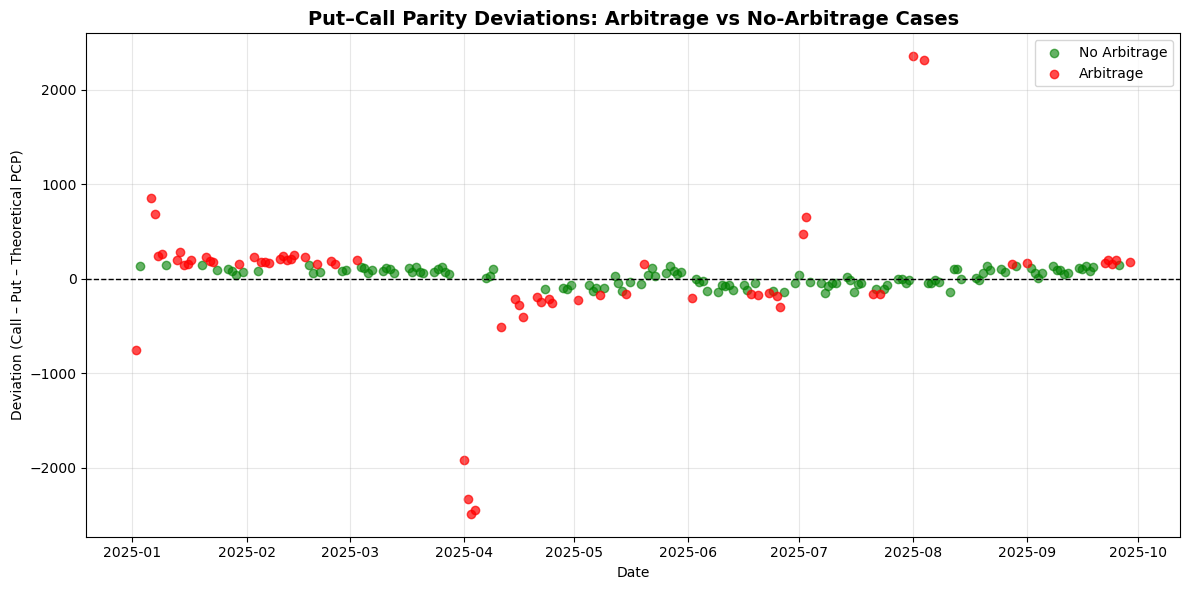

In [54]:
import matplotlib.pyplot as plt



plt.figure(figsize=(12,6))

plt.scatter(
    merged.loc[merged['Arbitrage'] == 'No_Arbitrage', 'Date'],
    merged.loc[merged['Arbitrage'] == 'No_Arbitrage', 'Deviation'],
    color='green', label='No Arbitrage', alpha=0.6
)
plt.scatter(
    merged.loc[merged['Arbitrage'] == 'Arbitrage', 'Date'],
    merged.loc[merged['Arbitrage'] == 'Arbitrage', 'Deviation'],
    color='red', label='Arbitrage', alpha=0.7
)

plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title('Put–Call Parity Deviations: Arbitrage vs No-Arbitrage Cases', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Deviation (Call – Put – Theoretical PCP)')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


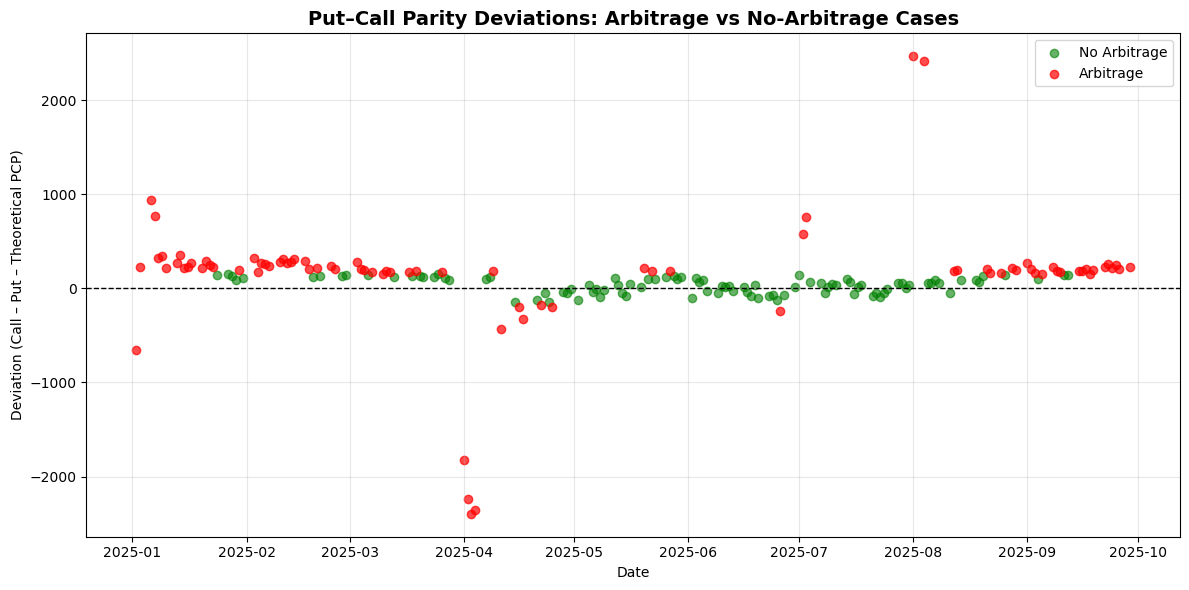

In [55]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))

plt.scatter(
    merged2.loc[merged2['Arbitrage'] == 'No_Arbitrage', 'Date'],
    merged2.loc[merged2['Arbitrage'] == 'No_Arbitrage', 'Deviation'],
    color='green', label='No Arbitrage', alpha=0.6
)
plt.scatter(
    merged2.loc[merged2['Arbitrage'] == 'Arbitrage', 'Date'],
    merged2.loc[merged2['Arbitrage'] == 'Arbitrage', 'Deviation'],
    color='red', label='Arbitrage', alpha=0.7
)

plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title('Put–Call Parity Deviations: Arbitrage vs No-Arbitrage Cases', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Deviation (Call – Put – Theoretical PCP)')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


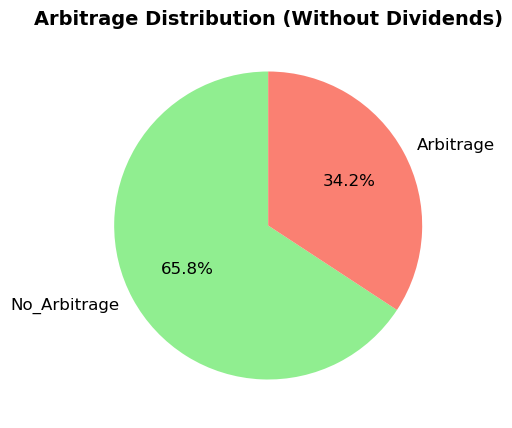

In [57]:
counts_no_div = merged['Arbitrage'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    counts_no_div,
    labels=counts_no_div.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'salmon'],
    textprops={'fontsize': 12}
)
plt.title('Arbitrage Distribution (Without Dividends)', fontsize=14, fontweight='bold')
plt.show()

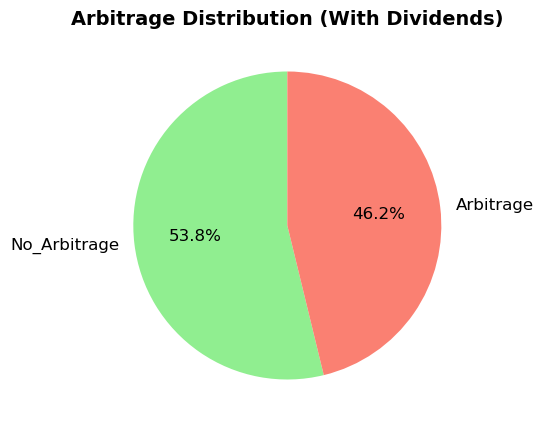

In [58]:
counts_no_div2 = merged2['Arbitrage'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    counts_no_div2,
    labels=counts_no_div2.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'salmon'],
    textprops={'fontsize': 12}
)
plt.title('Arbitrage Distribution (With Dividends)', fontsize=14, fontweight='bold')
plt.show()

In [59]:
monthwise_no_div = merged.groupby(['Month', 'Arbitrage']).size().unstack(fill_value=0)

monthwise_no_div['Total'] = monthwise_no_div.sum(axis=1)
monthwise_no_div['Arb_%'] = (monthwise_no_div['Arbitrage'] / monthwise_no_div['Total'] * 100).round(2)

print(monthwise_no_div)


Arbitrage  Arbitrage  No_Arbitrage  Total  Arb_%
Month                                           
2025-01           14             8     22  63.64
2025-02           13             6     19  68.42
2025-03            1            18     19   5.26
2025-04           12             7     19  63.16
2025-05            4            17     21  19.05
2025-06            6            15     21  28.57
2025-07            4            19     23  17.39
2025-08            3            16     19  15.79
2025-09            6            15     21  28.57


In [60]:
monthwise_with_div = merged2.groupby(['Month', 'Arbitrage']).size().unstack(fill_value=0)
monthwise_with_div['Total'] = monthwise_with_div.sum(axis=1)
monthwise_with_div['Arb_%'] = (monthwise_with_div['Arbitrage'] / monthwise_with_div['Total'] * 100).round(2)

print(monthwise_with_div)


Arbitrage  Arbitrage  No_Arbitrage  Total  Arb_%
Month                                           
2025-01           17             5     22  77.27
2025-02           15             4     19  78.95
2025-03           10             9     19  52.63
2025-04           10             9     19  52.63
2025-05            3            18     21  14.29
2025-06            1            20     21   4.76
2025-07            2            21     23   8.70
2025-08            9            10     19  47.37
2025-09           18             3     21  85.71


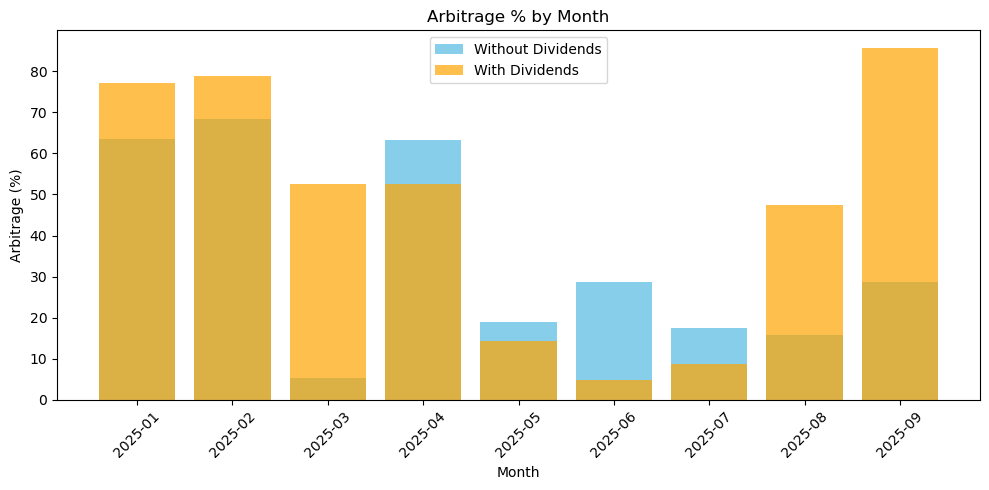

In [61]:
plt.figure(figsize=(10,5))
plt.bar(monthwise_no_div.index, monthwise_no_div['Arb_%'], color='skyblue', label='Without Dividends')
plt.bar(monthwise_with_div.index, monthwise_with_div['Arb_%'], color='orange', alpha=0.7, label='With Dividends')
plt.title('Arbitrage % by Month')
plt.xlabel('Month')
plt.ylabel('Arbitrage (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
